<h1>Nikola GetsDrawn</h1>

This is a python script to generate the website GetsDrawn. It takes data from /r/RedditGetsDrawn and makes something awesome. It uses the Nikola web framework in to make a website that is mobile friendly. 

The script has been rewritten several times and developed over time 

The first script for rgdsnatch was written after I got banned from posting my artwork on /r/RedditGetsDrawn. The plan was to create a new site that displayed stuff from /r/RedditGetsDrawn. 

Currently it only displays the most recent 25 items on redditgetsdrawn. The script looks at the newest 25 reference photos on RedditGetsDrawn. It focuses only on jpeg/png images and ignores and links to none .jpg or .png ending files. 
It is needed to instead of ignoring them files - get the image or images in some cases, from the link.
The photos are always submitted from imgur.
Still filter out the i.imgur files, but take the links and filter them through a python imgur module returning the .jpeg or .png files. 


This is moving forward from rgdsnatch.py because I am stuck on it.  

TODO

Fix the links that don't link to png/jpeg and link to webaddress. 
Needs to get the images that are at that web address and embed them.

Display artwork submitted under the images. 

Upload artwork to user. Sends them a message on redditgetsdrawn with links. 

More pandas

Saves reference images to imgs/year/month/day/reference/username-reference.png

Saves art images to imgs/year/month/day/art/username-line-bw-colour.png 

Creates index.html file with:
Title of site and logo: GetsDrawn
Last updated date and time. 

Path of image file /imgs/year/month/day/username-reference.png. 
(This needs changed to just their username).

Save off .meta data from reddit of each photo, saving it to reference folder.
username-yrmnthday.meta - contains info such as author, title, upvotes, downvotes.
Currently saving .meta files to a meta folder - along side art and reference. 

Folder sorting system of files. 
websitename/index.html-style.css-imgs/YEAR(15)-MONTH(2)-DAY(4)/art-reference-meta
Inside art folder
Currently it generates USERNAME-line/bw/colour.png 50/50 white files. Maybe should be getting art replies from reddit?

Inside reference folder
Reference fold is working decent. 
it creates USERNAME-reference.png / jpeg files. 

Currently saves username-line-bw-colour.png to imgs folder. Instead get it to save to imgs/year/month/day/usernames.png.
Script checks the year/month/day and if folder isnt created, it creates it. If folder is there, exit. 
Maybe get the reference image and save it with the line/bw/color.pngs

The script now filters the jpeg and png image and skips links to imgur pages. This needs to be fixed by getting the images from the imgur pages.
It renames the image files to the redditor username followed by a -reference tag (and ending with png of course).
It opens these files up with PIL and checks the sizes. 
It needs to resize the images that are larger than 800px to 800px.
These images need to be linked in the index.html instead of the imgur altenatives. 

Instead of the jpeg/png files on imgur they are downloaded to the server with this script. 

Filter through as images are getting downloaded and if it has been less than certain time or if the image has been submitted before 

Extending the subreddits it gets data from to cycle though a list, run script though list of subreddits.

Browse certain days - Current day by default but option to scroll through other days.

Filters - male/female/animals/couples etc
Function that returns only male portraits. 
tags to add to photos. 
Filter images with tags




In [1]:
import os 
import requests
import re
import json
import time
from time import gmtime, strftime
#import nose
import arrow
import shutil
import subprocess
import getpass
from google.cloud import translate

In [2]:
import pygcloud

In [3]:
#url = 'https://www.reddit.com/r/redditgetsdrawn.json'
#headers = {
#    'User-Agent': 'hammersmake@gmail.com',
    # This is another valid field
#}

#response = requests.get(url, headers=headers)

In [4]:
def getreference(subreddit):
    url = 'https://www.reddit.com/r/{}.json'.format(subreddit)
    headers = {'User-Agent': 'hammersmake@gmail.com'}
    # This is another valid field
    return(requests.get(url, headers=headers).json())
    

In [5]:
subjs = getreference('redditgetsdrawn')

In [6]:
subjs

{'data': {'after': 't3_adyakp',
  'before': None,
  'children': [{'data': {'approved_at_utc': None,
     'approved_by': None,
     'archived': False,
     'author': 'Yarightchump',
     'author_flair_background_color': '',
     'author_flair_css_class': None,
     'author_flair_richtext': [],
     'author_flair_template_id': None,
     'author_flair_text': 'Best of RGD Winner (x12)',
     'author_flair_text_color': 'dark',
     'author_flair_type': 'text',
     'author_fullname': 't2_yh35o',
     'author_patreon_flair': False,
     'banned_at_utc': None,
     'banned_by': None,
     'can_gild': False,
     'can_mod_post': False,
     'category': None,
     'clicked': False,
     'content_categories': None,
     'contest_mode': False,
     'created': 1546731071.0,
     'created_utc': 1546702271.0,
     'distinguished': 'moderator',
     'domain': 'self.redditgetsdrawn',
     'downs': 0,
     'edited': 1546703435.0,
     'gilded': 0,
     'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0},

In [7]:
def lenrefernce():
    return(len(subjs['data']['children']))

In [8]:
lenrefernce()

27

In [9]:
def listgallery(ldir):
    return(os.listdir(ldir + '/galleries'))

In [10]:
#listgallery('/mnt/c/Users/luke/Documents/zh-artctrl')

In [11]:
#totart = len(resjs['data']['children'])

In [12]:
#totart

In [13]:
#resjs['data']['children'][5]['data']['id']

In [14]:
allimg = os.listdir('/mnt/c/Users/luke/Documents/zh-artctrl/galleries')

In [15]:
import subprocess

In [16]:
import os 

In [17]:
os.chdir('/mnt/c/Users/luke/Documents/zh-artctrl/galleries')

In [18]:
#datet = arrow.now(resjs['data']['children'][tota]['data']['created'])


In [19]:
from google.cloud import translate


In [20]:
#from google.cloud import translate

# Instantiates a client
#translate_client = translate.Client()

# The text to translate
#text = u'Hello, world!'
# The target language
#target = 'zh_cn'

# Translates some text into Russian
#translation = translate_client.translate(
#    text,
#    target_language=target)

#print(u'Text: {}'.format(text))
#print(u'Translation: {}'.format(translation['translatedText']))

In [21]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/wcmckee/test.json"

In [22]:
#hanjs = requests.get('https://glosbe.com/transliteration/api?from=Han&dest=Latin&text=我&format=json')
#pingzh = hanjs.json()
#print(pingzh['text'])

In [23]:
def downloadimgs(wotsubred, ldir):
    getreference(wotsubred)
    resjs = subjs
    #subjs
    os.chdir(ldir)
    
    for tota in range(0, lenrefernce()):
        if '.jpg' in (resjs['data']['children'][tota]['data']['url']):
            idpost = resjs['data']['children'][tota]['data']['id']
            authinfo = (resjs['data']['children'][tota]['data']['author'])
            datet = arrow.get(resjs['data']['children'][tota]['data']['created'])
            translate_client = translate.Client()

            transzh = translate_client.translate(resjs['data']['children'][tota]['data']['title'], target_language='zh_cn')
            
            hanjs = requests.get('https://glosbe.com/transliteration/api?from=Han&dest=Latin&text={}&format=json'.format(transzh['translatedText']))
            pingzh = hanjs.json()
            #print(pingzh['text'])

            #if authinfo + '.png' not in listgallery(ldir):
                #print('image not there')
            subprocess.call('wget -O galleries/{}.png {}'.format(idpost, resjs['data']['children'][tota]['data']['url']), shell=True)
            with open(ldir + '/posts/' + authinfo + '.meta', 'w') as aupos:
                aupos.write('.. title: {}\n.. slug: {}\n.. date: {}\n.. tags: tagsz\n.. link:\n.. description:\n.. type: text'.format(idpost, idpost, datet)) 

            with open(ldir + '/posts/' + authinfo + '.md', 'w') as aumeta:
                aumeta.write('# {}\n\n![{}]({})\n\n{}'.format(authinfo, idpost, '/galleries/' + idpost + '.png', resjs['data']['children'][tota]['data']['title'] + '\n\n' + transzh['translatedText'] + '\n\n' + pingzh['text']))
            #else:
            #    pass
                #lisnum = (os.listdir(ldir).count(authinfo + '.png'))
                #print(type(lisnum))
                #lisnew = lisnum + 1 
                
                #subprocess.call('wget -O {}{}.png {}'.format(authinfo, lisnew, resjs['data']['children'][tota]['data']['url']), shell=True)
                #with open(ldir + '/posts/' + authinfo + str(lisnew) + '.meta', 'w') as aupos:
                #    aupos.write('.. title: {}\n.. slug: {}\n.. date: {}\n.. tags: tagsz\n.. link:\n.. description:\n.. type: text'.format(authinfo, authinfo, datet)) 

                #with open(ldir + '/posts/' + authinfo + str(lisnew) + '.md', 'w') as aumeta:
                #    aumeta.write('![{}]({})\n\n{}'.format(authinfo, '/galleries/' + authinfo + str(lisnew) + '.png', resjs['data']['children'][15]['data']['title']))




In [24]:
downloadimgs('redditgetsdrawn', '/mnt/c/Users/luke/Documents/zh-artctrl')

RefreshError: ('invalid_grant: Invalid JWT: Token must be a short-lived token (60 minutes) and in a reasonable timeframe. Check your iat and exp values and use a clock with skew to account for clock differences between systems.', '{\n  "error": "invalid_grant",\n  "error_description": "Invalid JWT: Token must be a short-lived token (60 minutes) and in a reasonable timeframe. Check your iat and exp values and use a clock with skew to account for clock differences between systems."\n}')

In [ ]:
#pygcloud.createbucket('getsdrawn')

In [ ]:
def deploysite(blogdir, syncname):
    os.chdir(blogdir)
    subprocess.call('nikola build', shell=True)
    pygcloud.makebucketsync(syncname, blogdir + '/output')

In [25]:
deploysite('/mnt/c/Users/luke/Documents/zh-artctrl/', 'getsdrawn')

NameError: name 'deploysite' is not defined

In [38]:
def submitart(blogdir, idreference):
    os.chdir(blogdir)
    for root, dirs, files in os.walk(blogdir + '/galleries/', topdown = False):
        for name in files:
            if idreference in name:
                print(os.path.join(root, name))
    #for name in dirs:

In [40]:
imagefile = submitart('/mnt/c/Users/luke/Documents/zh-artctrl', 'aco1f3')

/mnt/c/Users/luke/Documents/zh-artctrl/galleries/aco1f3.png


In [42]:
from PIL import Image


In [78]:
import shutil

In [ ]:
shutil.copyfile()

In [75]:
def createart(blogdir, idreference, artistname):
    img = Image.open(blogdir + '/galleries/' + idreference + '.png')
    basewidth = 200
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    im = Image.new("RGB", (2000, 1000), "white")
    newImage = Image.new('RGB', (800, 600), 'WHITE')
    newImage.paste(img)
    newImage.save(blogdir + '/galleries/' + artistname + '-' + idreference + '.png') 


    

In [88]:
os.listdir('/mnt/f/')

['piz2artctrl']

In [89]:
def copytousb(blogdir, idreference, artistname, copyto):
    shutil.copyfile(blogdir + '/galleries/' + artistname + '-' + idreference + '.png', copyto + artistname + '-' + idreference + '.png')
    

In [90]:
copytousb('/mnt/c/Users/luke/Documents/zh-artctrl', 'acvivp', 'art_control', '/mnt/f')

PermissionError: [Errno 13] Permission denied: '/mnt/fart_control-acvivp.png'

In [87]:
imgdisplay(filename='/mnt/f/art_control-acvivp.png')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/f/art_control-acvivp.png'

In [76]:
createart('/mnt/c/Users/luke/Documents/zh-artctrl', 'acvivp', 'art_control')

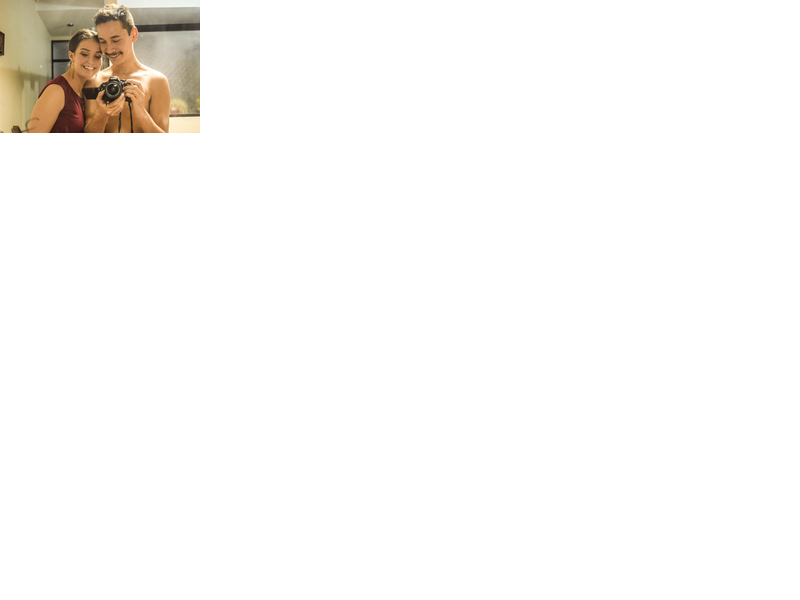

In [77]:
imgdisplay(filename='/mnt/c/Users/luke/Documents/zh-artctrl/galleries/art_control-acvivp.png')

In [45]:
img = Image.open('/mnt/c/Users/luke/Documents/zh-artctrl/galleries/aco1f3.png')

In [59]:
basewidth = 200


In [46]:
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('test.png') 

In [60]:
im = Image.new("RGB", (2000, 1000), "white")

In [61]:
im.size

(2000, 1000)

In [62]:
newImage.size

(800, 1600)

In [69]:
newImage = Image.new('RGB', (800, 600), 'WHITE')
newImage.paste(img)

In [70]:
newImage.save('img.png')

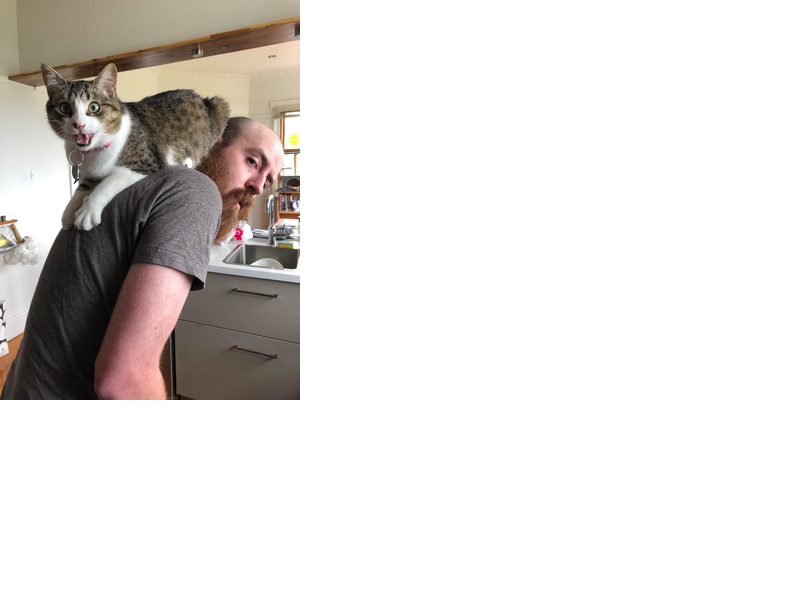

In [71]:
imgdisplay(filename='img.png')

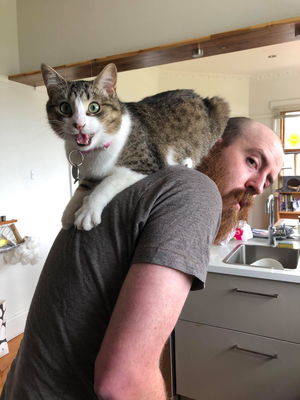

In [47]:
from IPython.display import Image as imgdisplay
imgdisplay(filename='test.png')

In [41]:
from PIL import Image

basewidth = 300
img = Image.open(imagefile)
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('test.png') 

AttributeError: 'NoneType' object has no attribute 'read'

In [65]:
#from codeq_nlp_api import CodeqClient

#client = CodeqClient(user_id="", user_key="")

#text = "We’d love to see your take on our little zoo family!"
#document = client.analyze(text)

#for sentence in document.sentences:
#    print(sentence.sentiment)

['Positive']


In [67]:
##for sentence in document.sentences:
#    print(sentence.emotions)

['Excitement']


In [69]:
##for sentence in document.sentences:
#    print(sentence.to_dict())

OrderedDict([('raw_sentence', "We'd love to see your take on our little zoo family!"), ('position', 0), ('tokens', ['We', "'d", 'love', 'to', 'see', 'your', 'take', 'on', 'our', 'little', 'zoo', 'family', '!']), ('tokens_filtered', ['love', 'little', 'zoo', 'family']), ('lemmas', ['we', "'d", 'love', 'to', 'see', 'your', 'take', 'on', 'our', 'little', 'zoo', 'family', '!']), ('pos_tags', ['PRP', 'MD', 'VB', 'TO', 'VB', 'PRP$', 'NN', 'IN', 'PRP$', 'JJ', 'NN', 'NN', '.']), ('dependencies', [['love@@@3', "'d@@@2", 'aux'], ['love@@@3', '!@@@13', 'punct'], ['love@@@3', 'see@@@5', 'xcomp'], ['love@@@3', 'We@@@1', 'nsubj'], ['take@@@7', 'on@@@8', 'prep'], ['take@@@7', 'your@@@6', 'poss'], ['family@@@12', 'zoo@@@11', 'nn'], ['family@@@12', 'our@@@9', 'poss'], ['family@@@12', 'little@@@10', 'amod'], ['root@@@0', 'love@@@3', 'root'], ['see@@@5', 'take@@@7', 'dobj'], ['see@@@5', 'to@@@4', 'aux'], ['on@@@8', 'family@@@12', 'pobj']]), ('truecase_sentence', "we 'd love to see your take on our little

In [31]:
# !/usr/bin/python3
import os

os.chdir("/home/wcmckee")
for root, dirs, files in os.walk("/home/wcmckee", topdown = False):
    for name in files:
        print(os.path.join(root, name))
    #for name in dirs:
    #      print(os.path.join(root, name))


/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-0363e723bed88ee5cef866bef0ee5e198338b6085883c60808f40ed117455293.pkl
/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-03b31b6f07c16ca7b42e2a0661d2e98d1c0730aa94d50e838037b56387939460.pkl
/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-03c227a51a1b1064d087c5cd4ef91686efa53520aa6f6c79f724807f4f482dec.pkl
/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-063d615fb995215e5225d33e0c59f977cfd52db84dcb1882cfdb4cf71b391119.pkl
/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-08a24c247c12939c5fc8557072b98fd048974ba1002f44564ce968c23d170b74.pkl
/home/wcmckee/.cache/jedi/CPython-36-30/cf52c2de18ad0c05e28d5c3f66bedc14a81ef0d66fd22eb563b363e1e64f8a28-0ce754ef5322d0199c8964eef

/home/wcmckee/.cache/pip/http/4/4/c/c/6/44cc6e844fc693329eb33dddadaab2abc00a172e29ed3af8bee96460
/home/wcmckee/.cache/pip/http/4/5/9/7/6/45976c194ebb9180bf7410d422bcad653ce13bcb64dda0d07d72b09d
/home/wcmckee/.cache/pip/http/4/5/9/c/1/459c164d9ee240dc086ea20e4130182feceabd583aa5367be8f6a67c
/home/wcmckee/.cache/pip/http/4/6/9/3/e/4693e3f9f6fc3c714fae30f8abd2678d0f8e8061a6785ec9ba1c0ea7
/home/wcmckee/.cache/pip/http/4/7/e/d/7/47ed7c9e32f2a38d83f21bb91e7ade7b5a6057147ac72cceaf33c10b
/home/wcmckee/.cache/pip/http/4/8/0/d/6/480d6f7ef777fd4fe0178a90255bde2c80a7d6807db13d9efb77f8d8
/home/wcmckee/.cache/pip/http/4/8/f/c/7/48fc756969b57239217d8defb3d47102dcad955fc63347bfc16e9870
/home/wcmckee/.cache/pip/http/4/9/3/7/6/49376319b6ae00174dba068f5ba7a55632fb685bf5894bd4483da5c9
/home/wcmckee/.cache/pip/http/4/9/a/6/5/49a65ef51069b1954617f8b76476ce09dc41c9efac53f4d81e1f5cf3
/home/wcmckee/.cache/pip/http/4/a/7/5/b/4a75be5ec812145702e7abc0b090eee5a42b5f21dfa806aa0f24c9c2
/home/wcmckee/.cache/pip/http/

/home/wcmckee/.cache/pip/http/9/b/3/d/5/9b3d5a9ab27715f14b0591fa23c2d63078fa405c6dcc8a5672e91204
/home/wcmckee/.cache/pip/http/9/c/c/6/9/9cc6939c61442ece13bdcac1a4f63ac9be8b2e7a5a8148e85ca678e2
/home/wcmckee/.cache/pip/http/9/c/c/9/3/9cc93e5bbcff177c78a646c6d59fe9852d5c0a4a50696b25d0a9eeb0
/home/wcmckee/.cache/pip/http/9/d/1/b/5/9d1b5609ebe8e758b25afac0a3ddcc4e7db01242a2daf131637ef728
/home/wcmckee/.cache/pip/http/9/d/f/8/d/9df8d6244493f7ef757e6d79a0ee9a4b7b133325ff1cf4158369c0a5
/home/wcmckee/.cache/pip/http/9/e/1/8/e/9e18e559b157b6accc70dabb5aa11ef0a39776158717faa028f343a6
/home/wcmckee/.cache/pip/http/9/e/3/e/1/9e3e160141f34477f10e68c836875622ed5a1a592545675f2407d6e2
/home/wcmckee/.cache/pip/http/9/e/6/1/9/9e61964f51d8a05a20ecf21eef694877f28cb654a123ce1316ff77e5
/home/wcmckee/.cache/pip/http/9/f/2/9/2/9f292e59213099651b5fcfd03d5cd2be236234e87bcc0df5dbd85d73
/home/wcmckee/.cache/pip/http/9/f/9/3/3/9f93306d7b672475999e1ccb003ed535876b07060341d71f2c054af0
/home/wcmckee/.cache/pip/http/

/home/wcmckee/.cache/pip/wheels/2c/4a/61/5599631c1554768c6290b08c02c72d7317910374ca602ff1e5/itsdangerous-0.24-cp35-none-any.whl
/home/wcmckee/.cache/pip/wheels/31/af/fa/e7abbc236d842b213509c59356ebe01ab73362f87e320cb8dd/pynano-1.0.1-py2.py3-none-any.whl
/home/wcmckee/.cache/pip/wheels/32/07/e0/87ff9595680e039f6a1da84e7075c5f6bdf0859b022673fcb0/apistar-0.6.0-cp36-none-any.whl
/home/wcmckee/.cache/pip/wheels/33/56/20/ebe49a5c612fffe1c5a632146b16596f9e64676768661e4e46/MarkupSafe-1.0-cp35-cp35m-linux_x86_64.whl
/home/wcmckee/.cache/pip/wheels/33/56/20/ebe49a5c612fffe1c5a632146b16596f9e64676768661e4e46/MarkupSafe-1.0-cp36-cp36m-linux_x86_64.whl
/home/wcmckee/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb/pyppeteer-0.0.25-cp35-none-any.whl
/home/wcmckee/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb/pyppeteer-0.0.25-cp36-none-any.whl
/home/wcmckee/.cache/pip/wheels/36/1f/d5/d9d639f26e78269ef0cdbdfd402a8a2f6eb1ebeb4d78f48b74/httpto

/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/decorator.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/easy_install.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/entrypoints.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/ipykernel_launcher.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/itsdangerous.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/jupyter.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/mistune.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/pandocfilters.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/pickleshare.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/pyinotify.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/__pycache__/simplegeneric.cpython-35.pyc
/home/wcmckee/.local/lib/python

/home/wcmckee/.local/lib/python3.5/site-packages/chardet/cli/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/cli/chardetect.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/big5freq.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/big5prober.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/chardistribution.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/charsetgroupprober.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/charsetprober.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/codingstatemachine.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/compat.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/cp949prober.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/enums.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/escprober.py
/home/wcmckee/.local/lib/python3.5/site-packages/chardet/es

/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/__pycache__/fake.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/__pycache__/getattr_static.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/__pycache__/mixed.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/_functools.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/_sqlite3.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/_sre.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/_weakref.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/builtins.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/datetime.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/evaluate/compiled/fake/io.pym
/home/wcmckee/.local/lib/python3.5/site-packages/jedi/e

/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/__pycache__/test_io.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/__pycache__/test_pandoc.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/__pycache__/test_version.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/test_io.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/test_pandoc.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/tests/test_version.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/base.py
/home/wcmckee/.local/lib/python3.5/site-packages/nbconvert/utils/exceptions.py

/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/greek-scripts.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/greek-small.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/greek-symbols.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/hebrew_letters.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/latin-lower-double-accent.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/latin-lower-normal.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/MathJax/extensions/a11y/mathmaps/en/symbols/latin-lower-phonetic.js
/home/wcmckee/.loc

/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/commonlisp/commonlisp.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/crystal/crystal.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/css/css.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/cypher/cypher.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/d/d.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/dart/dart.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/diff/diff.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/django/django.js
/home/wcmckee/.local/lib/python3.5/site-packages/notebook/static/components/codemirror/mode/dockerfile/dockerfile.js
/home/wcmckee/.local/lib/

/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/__pycache__/base.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/__pycache__/filesystem.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/__pycache__/word_completer.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/base.py
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/filesystem.py
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/completion/word_completer.py
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/contrib/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/contrib/completers/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/prompt_toolkit/contrib/completers/_

/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Azores
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Bermuda
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Canary
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Cape_Verde
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Faeroe
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Faroe
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Jan_Mayen
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Madeira
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Reykjavik
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/South_Georgia
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/St_Helena
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/Atlantic/Stanley
/home/wcmckee/.local/lib/pytho

/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Alaska
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Aleutian
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Arizona
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Central
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/East-Indiana
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Eastern
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Hawaii
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Indiana-Starke
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Michigan
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Mountain
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Pacific
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/US/Samoa
/home/wcmckee/.local/lib/python3.5/site-packages/pytz/zoneinfo/CET
/home/wcmckee/.local/lib/python3.5

/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_ansi_code_processor.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_app.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_completion_widget.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_console_widget.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_frontend_widget.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_jupyter_widget.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_kill_ring.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/qtconsole/tests/__pycache__/test_styles.cpython-35.pyc
/home/wcmckee/.loc

/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/compat.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/exceptions.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/plat_gio.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/plat_osx.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/plat_other.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__pycache__/plat_win.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/compat.py
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/exceptions.py
/home/wcmckee/.local/lib/python3.5/site-packages/send2trash/plat_gio.py
/home/wcmckee/.local/lib/python3.5/sit

/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__pycache__/asserts.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__pycache__/commands.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__pycache__/env.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__pycache__/tempdir.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/asserts.py
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/cli-32.exe
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/cli-64.exe
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/commands.py
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/env.py
/home/wcmckee/.local/lib/python3.5/site-packages/testpath/tempdir.py
/home/wcmckee/.local/lib/python3.5/site-packages/testpat

/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/DESCRIPTION.rst
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/INSTALLER
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/METADATA
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/RECORD
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/WHEEL
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/metadata.json
/home/wcmckee/.local/lib/python3.5/site-packages/traitlets-4.3.2.dist-info/top_level.txt
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/util.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x000.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x001.cpython-35.pyc
/home/wcmckee/.local/lib/python

/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0c7.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0c8.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0c9.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0ca.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0cb.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0cc.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0cd.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0ce.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0cf.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0d0.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/unidecode/__pycache__/x0d1.cpython-35.pyc

/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/DESCRIPTION.rst
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/INSTALLER
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/METADATA
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/RECORD
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/WHEEL
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/metadata.json
/home/wcmckee/.local/lib/python3.5/site-packages/visitor-0.1.3.dist-info/top_level.txt
/home/wcmckee/.local/lib/python3.5/site-packages/wcwidth/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/wcwidth/__pycache__/table_wide.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/wcwidth/__pycache__/table_zero.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/wcwidth/__pycache__/wcwidth.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/sit

/home/wcmckee/.local/lib/python3.5/site-packages/zmq/.libs/libsodium-1cc92866.so.23.1.0
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/.libs/libzmq-f7ef747e.so.5.1.5
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/__pycache__/_future.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/__pycache__/decorators.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/__pycache__/error.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/asyncio/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/asyncio/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/auth/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/auth/__pycache__/base.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/auth/__pycache__/certs.cpython-35.pyc
/home/wcmckee/.local/lib/pyth

/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/__pycache__/core.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/__pycache__/device.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/__pycache__/poll.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/__pycache__/__init__.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/__pycache__/ioloop.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/__pycache__/zmqstream.cpython-35.pyc
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/__init__.py
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/ioloop.py
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/eventloop/zmqstream.py
/home/wcmckee/.local/lib/python3.5/site-packages/zmq/green/__init__.py
/ho

/home/wcmckee/.local/share/jupyter/runtime/kernel-01dda863-9f73-4738-b51b-87bf83de23c6.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-046fc016-5ffc-4612-b631-ee836cc8899b.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-06044746-ee3b-4c36-a664-5852458389df.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-08ffccbb-b165-47d0-99f4-997c333b880b.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-0d246162-63c6-47af-8099-059eac4e6706.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-1307ff47-19d5-4aaf-bb0f-4c7bd25458d3.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-135f22e6-06a4-4767-ac69-edac561127d9.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-1befda37-3ba2-414d-bd59-e6f8e935d1dd.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-1fbca95d-18bb-4cad-8137-1febd6a08797.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-259afb46-67e3-4296-94e1-32a2a0e796e6.json
/home/wcmckee/.local/share/jupyter/runtime/kernel-339824a5-b550-46f9-845f-8f6a9f

/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/Nexus5X-landscape.svg
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/Nexus5X-portrait.svg
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/Nexus6P-landscape.svg
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/Nexus6P-portrait.svg
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/emulated_devices_module.js
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/google-nexus-5-horizontal-default-1x.png
/home/wcmckee/.local/share/pyppeteer/local-chromium/575458/chrome-linux/resources/inspector/emulated_devices/google-nexus-5-horizontal-default-2x.png
/home/wcmckee/.local/share/pyppeteer/local

/home/wcmckee/.npm/_cacache/content-v2/sha1/00/1d/df81628cd1e706125c7176f53ccec55d918e
/home/wcmckee/.npm/_cacache/content-v2/sha1/00/a9/f7387556e27038eae232caa372a6a59b665a
/home/wcmckee/.npm/_cacache/content-v2/sha1/00/c1/cdb1aca71112cdf0cf6126c2ed6b457ccdbc
/home/wcmckee/.npm/_cacache/content-v2/sha1/01/42/a4e8a243f8882c0233aa0e0281aa76152273
/home/wcmckee/.npm/_cacache/content-v2/sha1/01/ea/c0fe3b5af71a2a6c02feabb8c1fef7e00eab
/home/wcmckee/.npm/_cacache/content-v2/sha1/01/fc/bbb393463a548f2f466cce16dece49db908f
/home/wcmckee/.npm/_cacache/content-v2/sha1/02/0e/350a560a1fe1a98dc3beb6ccffb386de8b14
/home/wcmckee/.npm/_cacache/content-v2/sha1/02/58/eae4d3d0c0974de1c169188ef0051d1d1988
/home/wcmckee/.npm/_cacache/content-v2/sha1/03/19/1c432cb6eea168bb77f3a55ffdccb8978514
/home/wcmckee/.npm/_cacache/content-v2/sha1/03/71/ab4ae0bdd720d4166d7dfda64ff7a445a6c0
/home/wcmckee/.npm/_cacache/content-v2/sha1/04/21/e339fd71419b3da13d129b3979040230476e
/home/wcmckee/.npm/_cacache/content-v2/sha1

/home/wcmckee/.npm/_cacache/content-v2/sha1/24/f8/75d6721c87661bbd99a4622e51f14de38aa0
/home/wcmckee/.npm/_cacache/content-v2/sha1/24/fd/6201a4782cf50561c810276afc7d12d71195
/home/wcmckee/.npm/_cacache/content-v2/sha1/26/a7/1aaf073b39fb2127172746131c2704028db8
/home/wcmckee/.npm/_cacache/content-v2/sha1/26/cb/b5aff64144b0a825be1846e0b16cfa00b11e
/home/wcmckee/.npm/_cacache/content-v2/sha1/26/cb/fe935d1aeeeabb29bc3fe5aeb01e93d44226
/home/wcmckee/.npm/_cacache/content-v2/sha1/26/df/1d1c70348658e4dea2884319149b7b3183b5
/home/wcmckee/.npm/_cacache/content-v2/sha1/26/e6/1ed1422fb70dd42e6e36729ed51d855fe8d9
/home/wcmckee/.npm/_cacache/content-v2/sha1/27/0f/076c5a72c02f5b65a47df94c5fe3a278892f
/home/wcmckee/.npm/_cacache/content-v2/sha1/27/58/4810891456a4171c8d0226441ade90cbcaeb
/home/wcmckee/.npm/_cacache/content-v2/sha1/27/5c/d687f6e3b36cc756baa26dfee80a790301fd
/home/wcmckee/.npm/_cacache/content-v2/sha1/27/5e/cf0d7ffe05c77e64e7c86e4cd94bf0e1228a
/home/wcmckee/.npm/_cacache/content-v2/sha1

/home/wcmckee/.npm/_cacache/content-v2/sha1/49/6b/2cc109eca8dbacfe2dc72b603c17c5870ad4
/home/wcmckee/.npm/_cacache/content-v2/sha1/49/70/498be604c20c005d4f5c23aecd21d6b49099
/home/wcmckee/.npm/_cacache/content-v2/sha1/49/bd/6331d7d02d0c09bc910a1075ba8165b56df9
/home/wcmckee/.npm/_cacache/content-v2/sha1/49/d0/38837b8dcf8bfa5b9a42139938e6ea2ae240
/home/wcmckee/.npm/_cacache/content-v2/sha1/4a/52/82ac164729e93619bcfd3ad151f817ce91f5
/home/wcmckee/.npm/_cacache/content-v2/sha1/4a/6f/a07399c26bba47f0b2496b4d0fb408c5550d
/home/wcmckee/.npm/_cacache/content-v2/sha1/4a/92/734e0044c8cf0b1553be57eae21a4c6e5fab
/home/wcmckee/.npm/_cacache/content-v2/sha1/4a/be/bfeed7541f2c27acfb29bdbbd15c8d5ba4f7
/home/wcmckee/.npm/_cacache/content-v2/sha1/4b/0d/a1442104d1b336340e80797e865cf39f7d72
/home/wcmckee/.npm/_cacache/content-v2/sha1/4b/2b/1b27eb808a9f8dcc481a58e5e56f599f3f61
/home/wcmckee/.npm/_cacache/content-v2/sha1/4b/47/5760ff80264c762c3a1719032e91c7fea0d1
/home/wcmckee/.npm/_cacache/content-v2/sha1

/home/wcmckee/.npm/_cacache/content-v2/sha1/65/22/94c14651db28fa93bd2d5ff2983a4f08c636
/home/wcmckee/.npm/_cacache/content-v2/sha1/65/36/e378aff6cb1d5517ac0e40eb3e9fc8d08761
/home/wcmckee/.npm/_cacache/content-v2/sha1/65/ac/0504b3954171d8a64946b2ae3cbb8a5f54f6
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/26/6ee5f9bdb9940a4e4514cafb43bb71e5c9db
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/31/417d5f0e909a3d7ec26b24c8a8d1e4f96e4b
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/56/7e37043eeb4f04d91bd658c0cbefb55b8e04
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/8b/93776eaae55ebde8f3ad464b307a4963625e
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/ac/12153f5cd2d17b3c19268f4bf0197f44ecd6
/home/wcmckee/.npm/_cacache/content-v2/sha1/66/ea/1d856db4e8a5470cadf6fce23ae5244ef2e1
/home/wcmckee/.npm/_cacache/content-v2/sha1/67/60/cdd977f411d3e175bb064f2bc327d99b2b6e
/home/wcmckee/.npm/_cacache/content-v2/sha1/67/6f/6eb3c39997c2ee1ac3a924fd6124748f578d
/home/wcmckee/.npm/_cacache/content-v2/sha1

/home/wcmckee/.npm/_cacache/content-v2/sha1/87/10/d7af0aa626f8fffa1ce00168545263255748
/home/wcmckee/.npm/_cacache/content-v2/sha1/87/67/8a19d84b47d859b83199bd59bce222b10454
/home/wcmckee/.npm/_cacache/content-v2/sha1/87/77/4c0949e513f42e84575b3c45681fade2a0b2
/home/wcmckee/.npm/_cacache/content-v2/sha1/87/a1/0ac4c1694bd2e1cbf53591a66141fb5dd747
/home/wcmckee/.npm/_cacache/content-v2/sha1/87/a9/065cdb355d3182d8f94ce11188b825c68a3b
/home/wcmckee/.npm/_cacache/content-v2/sha1/87/f3/8f9f18f774a4ab4c8a232f5c5ce8872a9d15
/home/wcmckee/.npm/_cacache/content-v2/sha1/88/49/0d446502ea9b8e7efb0fe09ec4d99479b1ee
/home/wcmckee/.npm/_cacache/content-v2/sha1/88/69/a0401253661c4c4ca3da6c2121ed555f5eed
/home/wcmckee/.npm/_cacache/content-v2/sha1/88/8c/723596cdf7612f6498233eebd7a35301737d
/home/wcmckee/.npm/_cacache/content-v2/sha1/88/a2/bab73d1cf7bcd5c1b118a003f66f665fa662
/home/wcmckee/.npm/_cacache/content-v2/sha1/89/22/0ddf6b751ae52b5f72484863528596bb84c1
/home/wcmckee/.npm/_cacache/content-v2/sha1

/home/wcmckee/.npm/_cacache/content-v2/sha1/a1/57/ba402da24e9bf957f9aa69d524eed42901a6
/home/wcmckee/.npm/_cacache/content-v2/sha1/a1/d7/8fc3a50474cb80845d3b3b6e1da49a446e8e
/home/wcmckee/.npm/_cacache/content-v2/sha1/a1/d9/7ccafcbc2625cc70fadceb36a50c58b01a53
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/03/3c09cc8e158d37748fbde7507832bd6ce127
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/05/383fea322b33b5ae3b18abee0dc2f356ee15
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/30/f64f568310e1498009940790ec99545bca7e
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/4c/f47827f82d38fb59a69ad70b76e3b6ae7383
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/99/effd335fe2721ebae8e257ec79644fc85337
/home/wcmckee/.npm/_cacache/content-v2/sha1/a2/c8/02219c4203f754df1404e490186169d124d8
/home/wcmckee/.npm/_cacache/content-v2/sha1/a3/50/08b20f41383eec1fb914f4cd5df79a264284
/home/wcmckee/.npm/_cacache/content-v2/sha1/a3/b0/73f94ab49eb6fa55cd65227a334380632497
/home/wcmckee/.npm/_cacache/content-v2/sha1

KeyboardInterrupt: 